## UFRJ Analytica - Equipe 1

## Introdução

O propósito deste projeto consiste em analisar os dados provenientes do sistema de compartilhamento de bicicletas da cidade de Nova Iorque, identificar as suas particularidades e, por fim, realizar uma previsão.

**Importante**: Devido à restrição de espaço no Github, os dados estão hospedados no Drive. Portanto, é necessário fazer o download dos dados e salvá-los localmente na pasta "Dados", localizada na raiz do sistema. O código abaixo foi desenvolvido para realizar o download e o salvamento dos dados automaticamente.<br>
Fonte original dos dados: https://s3.amazonaws.com/tripdata/index.html

### Descrição das Features

O nosso conjunto de dados é descrito da seguinte forma:

|Atributo                                           |   Descrição   |
|---------------------------------------------------|:-------------:|
| tripduration                                      |   Duração da viagem em segundos | 
| starttime                                         |   Início da viagem | 
| stoptime                                          |   Fim da Viagem   | 
| start station id                                  |   Identificado da estação origem   | 
| start station name                                |   Nome da estação onde a viagem iniciou|
| start station latitude / start station longitude  |   Localização onde a viagem iniciou|
| end station id                                    |   Identificado da estação destino   | 
| end station name                                  |   Nome da estação onde a viagem terminou|
| end station latitude / end station longitude       |   Localização onde a viagem terminou   |
| bikeid                                           |   Identificado da bicicleta  |
| usertype                                          |   Customer = passe de 24 horas ou 3 dias; Subscriber = Membro Anual |
| birth year                                        |   Ano de nascimento|
| gender                                            |   0 = desconhecido; 1 = masculino; 2 = feminino |

### To do

**Análise de Dados:**
* [ ] Análise Prelimiar.
* [ ] Limpeza dos dados.
* [ ] Escreva algo aqui.

**Modelagem:**
* [ ] Escreva algo aqui.

**Conclução:**
* [ ] Escreva algo aqui.

## Importações

In [1]:
import pandas as pd 
import requests
import os

# Análise de Dados

### Download dos Dados

O conteúdo do arquivo será lido e alocado na variável denominada "``data_trips``".

In [5]:
# Link do arquivo do Google Drive
link = 'https://drive.google.com/file/d/1a8gzQg37aaDHBO6OBVMieOZmNU7jTOL1/view?usp=share_link'

# Obtendo o ID do arquivo
file_id = link.split('/')[-2]

# Verificando se o arquivo já existe
file_path = r'D:\Arquivos HD\Documentos HD\biblioteca\Matematica\UFRJ Analytica\Processo Seletivo 2023.1\analise-shared-bikes-ny-master\Exporacao 2023.1\Equipe 1\dados\citibike2018_2019_sample.parquet'
if not os.path.isfile(file_path):
    # Se não existe, faça o download do arquivo
    url = f'https://drive.google.com/uc?id={file_id}&export=download'
    response = requests.get(url)
    content = response.content

    # Salve o arquivo localmente
    with open(file_path, 'wb') as f:
        f.write(content)
    
# Lendo o arquivo
data_trips = pd.read_parquet(file_path)

### Análise Prelimiar

Continue...

In [11]:
df = pd.DataFrame(data_trips)

In [13]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,882,2018-11-25 18:21:38.7740,2018-11-25 18:36:21.4720,423.0,W 54 St & 9 Ave,40.765849,-73.986905,476.0,E 31 St & 3 Ave,40.743943,-73.979661,20049,Customer,1969,0
1,669,2018-08-13 18:25:50.5440,2018-08-13 18:36:59.9680,3467.0,W Broadway & Spring Street,40.724947,-74.001659,327.0,Vesey Pl & River Terrace,40.715338,-74.016584,33847,Subscriber,1987,1
2,521,2018-12-18 20:12:15.0620,2018-12-18 20:20:57.0170,411.0,E 6 St & Avenue D,40.722281,-73.976687,504.0,1 Ave & E 16 St,40.732219,-73.981656,30284,Subscriber,1971,1
3,270,2018-05-18 14:23:52.1050,2018-05-18 14:28:22.4910,437.0,Macon St & Nostrand Ave,40.680983,-73.950048,3047.0,Halsey St & Tompkins Ave,40.682369,-73.944118,31542,Subscriber,1964,1
4,441,2018-08-14 19:00:15.8670,2018-08-14 19:07:37.0520,519.0,Pershing Square North,40.751873,-73.977706,498.0,Broadway & W 32 St,40.748549,-73.988084,18363,Subscriber,1979,1


In [14]:
df_time_series = df.copy()

In [18]:
df["starttime"] = pd.to_datetime(df["starttime"])
df["date-hour"] = df["starttime"].dt.floor("H")
usage_series = df.groupby("date-hour").size().asfreq("h")


In [19]:
usage_series.head()

date-hour
2018-01-01 00:00:00    4.0
2018-01-01 01:00:00    5.0
2018-01-01 02:00:00    4.0
2018-01-01 03:00:00    1.0
2018-01-01 04:00:00    NaN
Freq: H, dtype: float64

In [20]:
# Precisamos que o dataframe tenha a propriedade de frequência por hora
usage_series = usage_series.asfreq('h')

In [21]:
# Precisamos preencher os buracos vazios com uma interpolação
usage_series = usage_series.interpolate()

<AxesSubplot:xlabel='date-hour'>

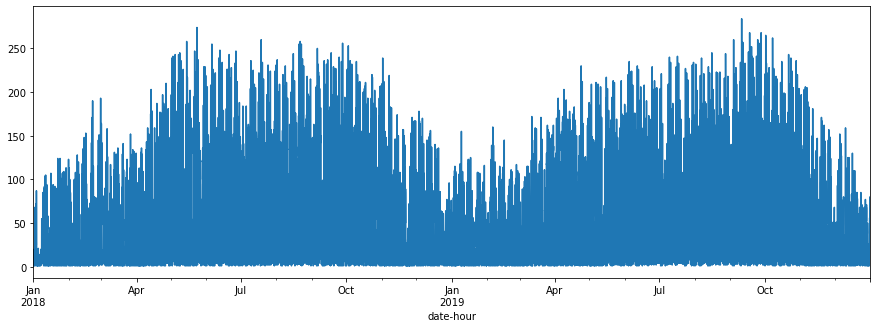

In [22]:
usage_series.plot(figsize=(15,5))